# Dogs & Cats Model 

### Niraj Khankari 

# Install Libraries

In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
tf.__version__

'2.17.0'

# Part 1 : Data Preprocessing

## Preprocessing the Training Data

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

training_dataset = train_datagen.flow_from_directory("D:\\Niraj Khankari\\Unstop AI-ML Projects\\Image Based Recognition\\Dataset\\train",
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_dataset = test_datagen.flow_from_directory("D:\\Niraj Khankari\\Unstop AI-ML Projects\\Image Based Recognition\\Dataset\\test",
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 12461 images belonging to 2 classes.


In [15]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_dataset = validation_datagen.flow_from_directory("D:\\Niraj Khankari\\Unstop AI-ML Projects\\Image Based Recognition\\Dataset\\validation",
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 5000 images belonging to 2 classes.


# Part 2 - Building the CNN

### Initialing the CNN

In [17]:
cnn = tf.keras.models.Sequential()

### Step 1 : Convolution

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size =3, activation = 'relu', input_shape = [64, 64, 3]))

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 : Pooling

In [22]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

### Adding Second Convolutional Layer

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size =3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

### Step 3 : Flattening

In [28]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 : Full Connection

In [31]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

### Step 5 : Output Layer

In [34]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Part 3 - Training the CNN

### Compiling the CNN 

In [38]:
 cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test Set 

In [51]:
cnn.fit(x = training_dataset, validation_data = test_dataset, epochs = 25)

Epoch 1/25


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 329s 519ms/step - accuracy: 0.5871 - loss: 0.6685 - val_accuracy: 0.7011 - val_loss: 0.5840
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - accuracy: 0.7121 - loss: 0.5606 - val_accuracy: 0.7573 - val_loss: 0.4917
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 138ms/step - accuracy: 0.7566 - loss: 0.4989 - val_accuracy: 0.7686 - val_loss: 0.4802
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.7684 - loss: 0.4750 - val_accuracy: 0.7911 - val_loss: 0.4439
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.7873 - loss: 0.4466 - val_accuracy: 0.7927 - val_loss: 0.4523
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 140ms/step - accuracy: 0.8040 - loss: 0.4203 - val_accuracy: 0.8013 - val_loss: 0.4469
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 168ms/step - accuracy: 0.8131 - loss: 0.4067 - val_accuracy: 0.8116 - val_loss: 0.4137
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 149ms/step - accuracy: 0.8241 - loss: 0.3857 - 

# Part 4 - Making a Single Prediction

In [75]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("D:\\Niraj Khankari\\Unstop AI-ML Projects\\Image Based Recognition\\Dataset\\test\\Dogs\\dog (16).jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [80]:
print(f" The Prediction is of {prediction}.")
print(f" The Result is {result}.")


 The Prediction is of dog.
 The Result is [[1.]].


In [82]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("D:\\Niraj Khankari\\Unstop AI-ML Projects\\Image Based Recognition\\Dataset\\test\\Cats\\cat (282).jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [84]:
print(f" The Prediction is of {prediction}.")
print(f" The Result is {result}.")

 The Prediction is of cat.
 The Result is [[0.]].


# Output with Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The Prediction is: cat
The Result (raw model output): [[0.]]


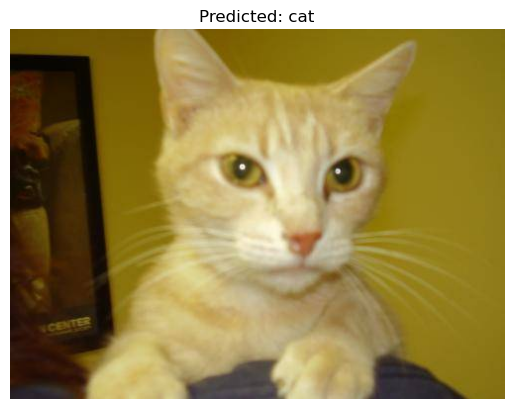

In [89]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess image
img_path = "D:\\Niraj Khankari\\Unstop AI-ML Projects\\Image Based Recognition\\Dataset\\test\\Cats\\cat (282).jpg"
test_image = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array, axis=0)

# Predict
result = cnn.predict(img_array)
prediction = 'dog' if result[0][0] == 1 else 'cat'

# Show prediction
print(f"The Prediction is: {prediction}")
print(f"The Result (raw model output): {result}")

# Display the image
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {prediction}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The Prediction is: cat
The Result (raw model output): [[0.]]


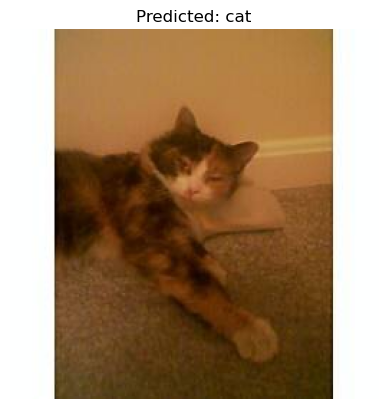

In [95]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess image
img_path = "D:\\Niraj Khankari\\Unstop AI-ML Projects\\Image Based Recognition\\Dataset\\test\\Cats\\cat (252).jpg"
test_image = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array, axis=0)

# Predict
result = cnn.predict(img_array)
prediction = 'dog' if result[0][0] == 1 else 'cat'

# Show prediction
print(f"The Prediction is: {prediction}")
print(f"The Result (raw model output): {result}")

# Display the image
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {prediction}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The Prediction is: dog
The Result (raw model output): [[1.]]


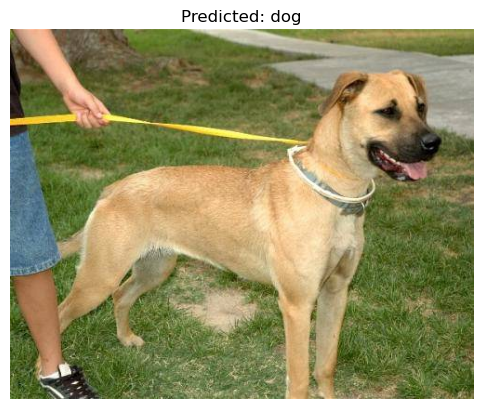

In [91]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess image
img_path = "D:\\Niraj Khankari\\Unstop AI-ML Projects\\Image Based Recognition\\Dataset\\test\\Dogs\\dog (16).jpg"
test_image = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array, axis=0)

# Predict
result = cnn.predict(img_array)
prediction = 'dog' if result[0][0] == 1 else 'cat'

# Show prediction
print(f"The Prediction is: {prediction}")
print(f"The Result (raw model output): {result}")

# Display the image
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {prediction}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The Prediction is: dog
The Result (raw model output): [[1.]]


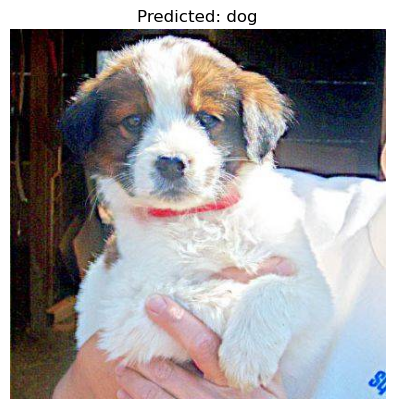

In [93]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess image
img_path = "D:\\Niraj Khankari\\Unstop AI-ML Projects\\Image Based Recognition\\Dataset\\test\\Dogs\\dog (18).jpg"
test_image = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array, axis=0)

# Predict
result = cnn.predict(img_array)
prediction = 'dog' if result[0][0] == 1 else 'cat'

# Show prediction
print(f"The Prediction is: {prediction}")
print(f"The Result (raw model output): {result}")

# Display the image
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {prediction}")
plt.axis('off')
plt.show()
